# What are the factors that best predict the rate of homelessness in U.S. cities? 
Subquestion: What is the projected rate of homelessness in Hawaii for 2023?

The [HUD](https://www.huduser.gov/portal/pdrdatas_landing.html) website provides a variety of datasets regarding housing and homelessness that may prove useful.

## Description of Current Data:
- hic_df_total: 2007 - 2021 Housing Inventory Count (HIC) by State, 56 rows (one for each state, totalled stats)
- 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### EDA hic_df_total

In [69]:
hic_df_total = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/2007-2021-HIC-Counts-by-State.xlsx', header=1)

In [70]:
hic_df_total.head()

,State,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK,2270,1703,1603,0.7062,1769,501,0,204,603,...,88,88,88,1,3,8,80,0,0,0
1,AL,2394,1892,1365,0.5702,1682,678,34,300,831,...,42,42,42,1,0,0,42,0,10,0
2,AR,2615,1996,1399,0.5350,2238,377,0,270,922,...,0,0,0,.,0,0,0,0,0,0
3,AZ,6411,5718,5047,0.7872,4292,2026,93,818,2752,...,354,354,354,1,73,297,57,0,29,3
4,CA,60582,56569,44594,0.7361,45229,14800,553,7671,23745,...,11044,10891,6092,0.5516,1100,3542,7466,36,521,322


In [71]:
hic_df_total.shape

(56, 77)

In [72]:
hic_df_total.columns

Index(['State', 'Total Year-Round Beds (ES, TH, SH)',
       'Total Non-DV Year-Round Beds (ES, TH, SH)',
       'Total HMIS Year-Round Beds (ES, TH, SH)',
       'HMIS Participation Rate for Year-Round Beds (ES, TH, SH)',
       'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)',
       'Total Year-Round Beds (SH)',
       'Total Units for Households with Children (ES, TH, SH)',
       'Total Beds for Households with Children (ES, TH, SH)',
       'Total Beds for Households without Children (ES, TH, SH)',
       'Total Beds for Households with only Children (ES, TH, SH)',
       'Dedicated Veteran Beds (ES, TH, SH)',
       'Dedicated Youth Beds (ES, TH, SH)', 'Total Year-Round Beds (ES).1',
       'Total Non-DV Year-Round Beds (ES)', 'Total HMIS Year-Round Beds (ES)',
       'HMIS Participation Rate for Year-Round Beds (ES)',
       'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)',
       'Total Units for Households with Children (ES)',
       'Total Beds for Households

### EDA Homelessness Prediction Data

#### Learning about the features of our dataset:

This data is from [this article](https://www.huduser.gov/portal/publications/Market-Predictors-of-Homelessness.html) titled Market Predictors of Homelessness: How Housing and Community Factors Shape Homelessness Rates Within Continuums of Care. The article found that housing factors are most consistently associated with higher rates of community-level homelessness (at the Continuum of Care (CoC) level). 

In [73]:
raw_df = pd.read_csv('https://www.huduser.gov/portal/sites/default/files/xls/05b_analysis_file_update.csv')

data_dict = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20Dictionary.xlsx')


Inspecting the data dictionary is very informative. Let's take a look first at what variables can be considered "Outcomes". 

In [74]:
from tabulate import tabulate

In [75]:
temp = data_dict[data_dict['Associated Domain'] == 'Outcome']
outcome_features = temp['Variable'].values

print(tabulate(temp[['Variable', 'Variable Label']], headers='keys', tablefmt='psql'))


+-----+-----------------------------+--------------------------------------------------------------------+
|     | Variable                    | Variable Label                                                     |
|-----+-----------------------------+--------------------------------------------------------------------|
|   2 | pit_tot_shelt_pit_hud       | total sheltered - HUD PIT                                          |
|   3 | pit_tot_unshelt_pit_hud     | total unsheltered - HUD PIT                                        |
|   4 | pit_tot_hless_pit_hud       | total homeless - HUD PIT                                           |
| 126 | pit_miss                    | sum of all PIT count values                                        |
| 127 | odd_flag                    | odd year of data indicator                                         |
| 128 | pit_hless_balance           | number of non-missing total homeless values across all years       |
| 129 | pit_shelt_balance           |

In [77]:
# this is here if I ever want to inspect the meaning of a specific feature
def what_is_this_feature(feat_name):
    print(data_dict[data_dict['Variable'] == feat_name]['Variable Label'].values)

what_is_this_feature('pit_tot_hless_pit_hud')

['total homeless - HUD PIT']


In [78]:
raw_df.head()

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0


In [79]:
raw_df.describe()

,year,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,pit_perfam_hless_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
count,3008.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,...,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,2013.500000,1033.852037,526.581830,1560.433868,540.342351,442.891784,983.230795,493.509686,83.693387,577.203073,...,0.610372,0.632314,0.600399,1.950133,0.562500,0.140957,0.194149,0.276596,0.425532,0.297872
std,2.291669,3445.807044,1742.313472,4313.387045,1367.938173,1569.110148,2497.924191,2134.964146,338.834491,2179.472363,...,0.487747,0.482256,0.489898,1.341383,0.496161,0.348036,0.395610,0.447389,0.494506,0.457399
min,2010.000000,3.000000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.750000,224.000000,36.250000,320.250000,120.250000,31.000000,192.000000,89.000000,0.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.500000,445.500000,114.000000,679.000000,253.000000,98.000000,428.000000,175.000000,6.000000,217.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.250000,961.500000,418.250000,1468.000000,560.000000,337.000000,930.000000,397.000000,40.000000,493.000000,...,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2017.000000,72565.000000,42828.000000,76501.000000,27188.000000,41241.000000,49265.000000,45711.000000,6948.000000,45711.000000,...,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Handling missing data:
There is a lot of it.

<AxesSubplot: >

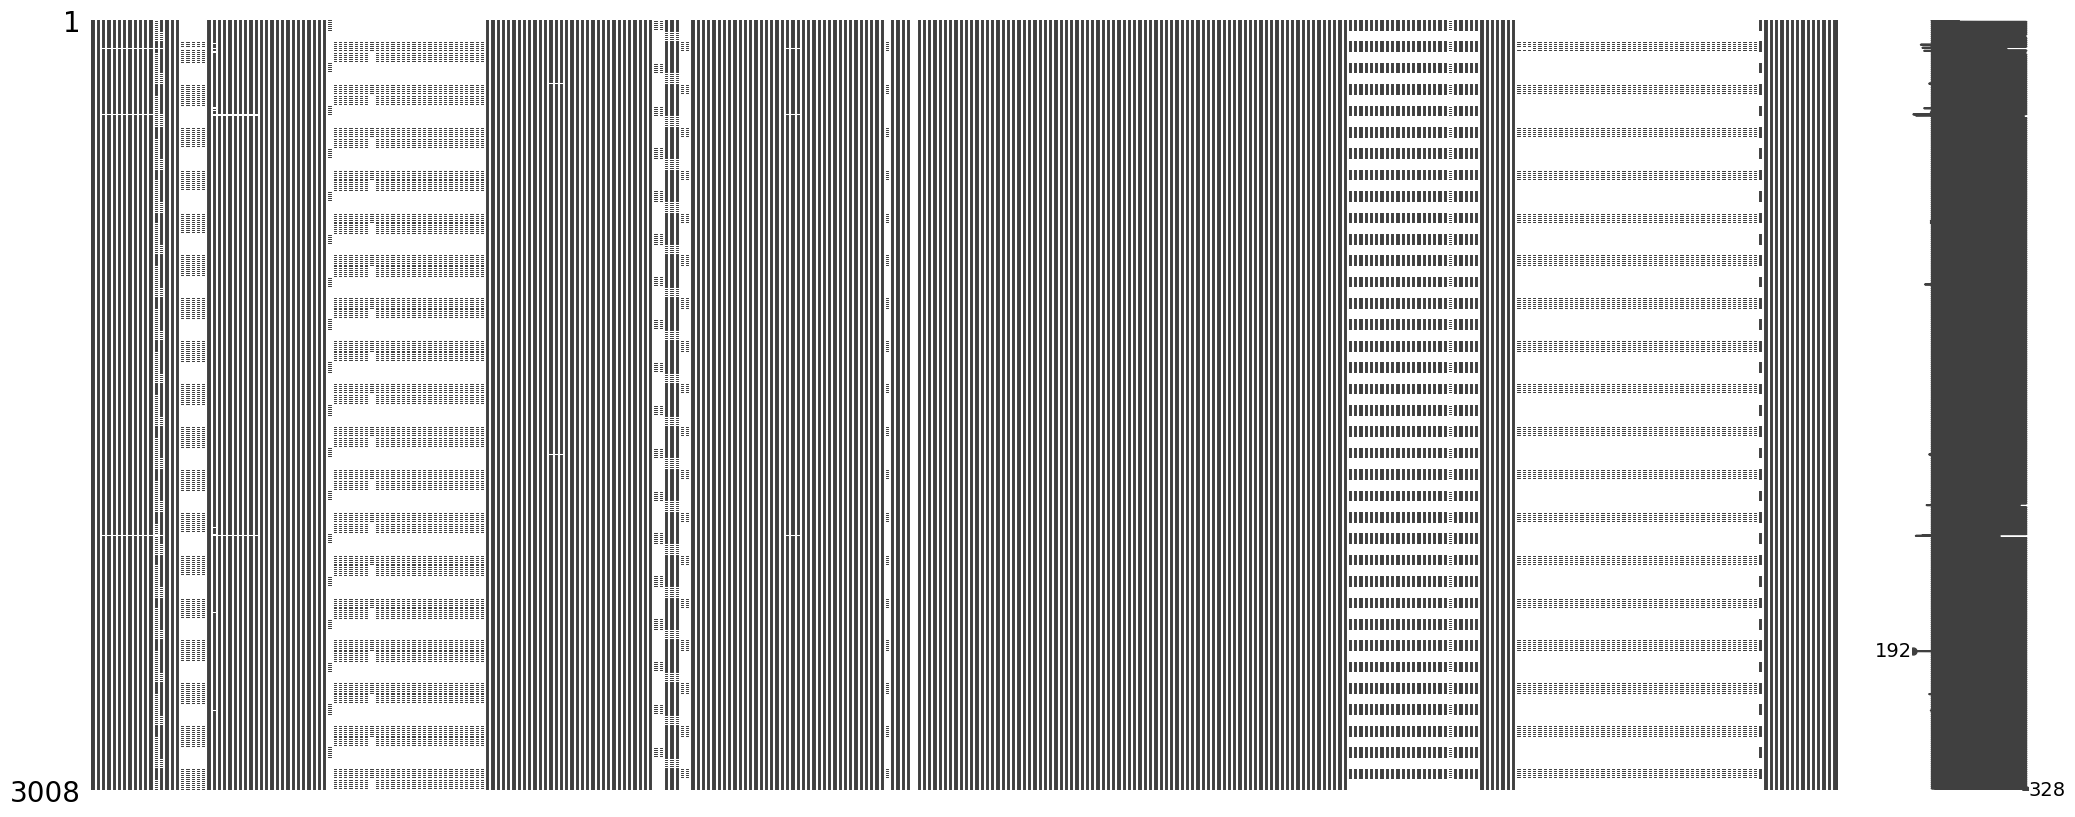

In [80]:
import missingno as msno

msno.matrix(raw_df)

In [81]:
raw_df.isnull().sum().sort_values(ascending=False)

dem_health_ins_acs5yr_2012       3008
d_pit_hless_pit_hud_share        2635
d_pit_shelt_pit_hud_share        2635
d_pit_unshelt_pit_hud_share      2635
d_hou_pol_occhudunit_psh_hud     2632
                                 ... 
dem_soc_ed_hsgrad_acs5yr_2012       0
dem_soc_ed_hsgrad_acs5yr_2017       0
dem_soc_ed_lesshs_acs5yr_2012       0
cocnumber                           0
rural                               0
Length: 332, dtype: int64

Let's inspect what some of these features with almost all NaNs actually are.

In [82]:
what_is_this_feature('dem_health_ins_acs5yr_2012')
what_is_this_feature('d_pit_hless_pit_hud_share')



['2011 share of the population with health insurance']
['4-year change in pit_hless_pit_hud_share values (2017 and 2013)']


In [83]:
raw_df['dem_health_ins_acs5yr_2012']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3003   NaN
3004   NaN
3005   NaN
3006   NaN
3007   NaN
Name: dem_health_ins_acs5yr_2012, Length: 3008, dtype: float64

Certainly if all of the values are NaN in a feature there is no predictive power in the feature, let's drop it.

In [84]:
raw_df.drop(['dem_health_ins_acs5yr_2012'], axis=1, inplace=True)

Some of these features with a large majority of missing vals are considered "Outcome" values and wouldn't be included in our predictive feature space anyway, so let's drop these target features and move to handle NaNs from there.

In [85]:
raw_df.isnull().sum().sort_values(ascending=False)

d_pit_hless_pit_hud_share        2635
d_pit_shelt_pit_hud_share        2635
d_pit_unshelt_pit_hud_share      2635
d_hou_pol_fedfundcoc             2632
d_dem_soc_asian_census_share     2632
                                 ... 
dem_soc_ed_hsgrad_acs5yr_2012       0
dem_soc_ed_hsgrad_acs5yr_2017       0
dem_soc_ed_lesshs_acs5yr_2012       0
cocnumber                           0
rural                               0
Length: 331, dtype: int64

In [86]:
what_is_this_feature('d_econ_sn_cashasst_xt')
what_is_this_feature('d_hou_pol_occhudunit_psh_hud')



['4-year change in econ_sn_cashasst_xt values (2017 and 2013)']
['4-year change in hou_pol_occhudunit_psh_hud values (2017 and 2013)']


It seems that this dataframe used the difference in certain features between 2017 and 2013 to engineer a new feature. This dataset includes years that aren't 2017 and 2013, however, and therefore there are a lot of missing values. I'm not sure the usecase for these values, so let's just drop them.

In [87]:

difference_cols = raw_df.columns[["d_" in i[:2] for i in raw_df.columns ]].values
raw_df.drop(difference_cols, axis=1, inplace=True)
print(len(difference_cols), " columns dropped")

46  columns dropped


In [88]:
# TODO: evaluate what these features mean
raw_df.drop(raw_df.columns[(raw_df.isnull().sum() == 2632)].values, axis=1, inplace=True)

Honestly, let's just drop all columns with NaNs in them, because there are 84 of them and I'm not really sure what they are. However, let's exclude the outcome features and simply drop those by row.

In [108]:
print(f"There are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")

raw_df.drop([col for col in raw_df.columns[(raw_df.isnull().sum() != 0)].values if col not in outcome_features], axis=1, inplace=True)

print(f"Dropped NaNs by column: there are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")

raw_df.dropna(inplace=True) # drop NaNs by rows

print(f"Dropping NaNs by rows: there are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")


There are 6 features with NaNs in them
Now there are 6 features with NaNs in them
Now there are 0 features with NaNs in them


In [109]:
raw_df.shape

(2994, 194)

Now that we have dropped a lot of columns, let's print out the description of those that remain to keep as a record.

In [133]:
print(tabulate(data_dict[[i in raw_df.columns.values for i in data_dict['Variable']]][['Variable', 'Variable Label']], headers='keys', tablefmt='psql'))

+-----+----------------------------------+----------------------------------------------------------------------------------+
|     | Variable                         | Variable Label                                                                   |
|-----+----------------------------------+----------------------------------------------------------------------------------|
|   0 | year                             | year                                                                             |
|   1 | cocnumber                        | continuum of care number                                                         |
|   2 | pit_tot_shelt_pit_hud            | total sheltered - HUD PIT                                                        |
|   3 | pit_tot_unshelt_pit_hud          | total unsheltered - HUD PIT                                                      |
|   4 | pit_tot_hless_pit_hud            | total homeless - HUD PIT                                                   

#### Managing Datatypes

In [91]:
raw_df = raw_df.convert_dtypes() # this didn't do much
raw_df.columns[((raw_df.dtypes != "Int64") & (raw_df.dtypes != "Float64"))]

Index(['cocnumber', 'state_abr'], dtype='object')

In [92]:
raw_df.groupby(['cocnumber']).sum()

/tmp/ipykernel_3051735/501702472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(['cocnumber']).sum()


,year,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,econ_urb_urbanicity,coctag,panelvar,hou_pol_fedfundcoc,dem_pop_pop_census,dem_pop_male_census,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
cocnumber,,,,,,,,,,,,,,,,,,,,,
AK-500,16108,8199,988,9187,24,1,8,228.45752,2370146,1209126,...,8,8,6,26,8,8,8,8,0,0
AK-501,16108,5016,1172,6188,8,1,16,60.10038,3444663,1825871,...,6,4,4,14,4,0,8,0,0,8
AL-500,16108,7800,4401,12201,16,1,24,683.23731,7575279,3626627,...,4,4,4,12,4,0,0,0,8,0
AL-501,16108,3026,2107,5133,24,1,32,296.7977,4852056,2336501,...,4,4,4,12,4,0,0,8,0,0
AL-502,16108,1603,172,1775,8,1,40,42.50069,2130112,1035103,...,4,4,4,12,4,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV-500,16108,831,115,946,8,1,2992,34.66596,1168112,567056,...,4,4,4,12,4,0,0,0,0,8
WV-501,16108,1695,208,1903,8,1,3000,144.90502,1103300,537988,...,4,4,4,12,4,0,0,0,0,8
WV-503,16108,2693,318,3011,16,1,3008,104.7769,2240164,1087585,...,4,4,4,12,4,0,0,0,8,0


#### Graphing Targets

Let's start with the target of `pit_hless_pit_hud_share`. As explored before, this variable represents the number of homeless per 10,000 population and therefore represents a normalized target feature.

In [112]:
target = 'pit_hless_pit_hud_share'
y_balanced = raw_df[target]

In [113]:
total_homeless_rates = pd.concat([raw_df[['cocnumber', 'state_abr', 'year']], y_balanced], axis=1)
total_homeless_rates[total_homeless_rates['year'] == 2017]

,cocnumber,state_abr,year,pit_hless_pit_hud_share
7,AK-500,AK,2017,37.931778
15,AK-501,AK,2017,16.143341
23,AL-500,AL,2017,11.395156
31,AL-501,AL,2017,9.737114
39,AL-502,AL,2017,5.843235
...,...,...,...,...
2975,WV-500,WV,2017,8.293972
2983,WV-501,WV,2017,15.034946
2991,WV-503,WV,2017,11.624221
2999,WV-508,WV,2017,5.228957


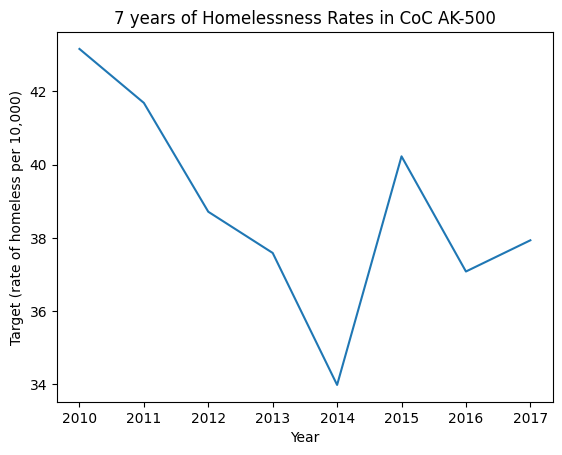

In [117]:
AK500_df = raw_df[raw_df["cocnumber"] == "AK-500"]

plt.plot(AK500_df['year'], AK500_df[target])
plt.xlabel("Year")
plt.ylabel("Target (rate of homeless per 10,000)")
plt.title("7 years of Homelessness Rates in CoC AK-500");

Plotting some violin plots for the indicator variables in our dataset.

In [160]:
raw_df[target] = raw_df[target].astype('float64')

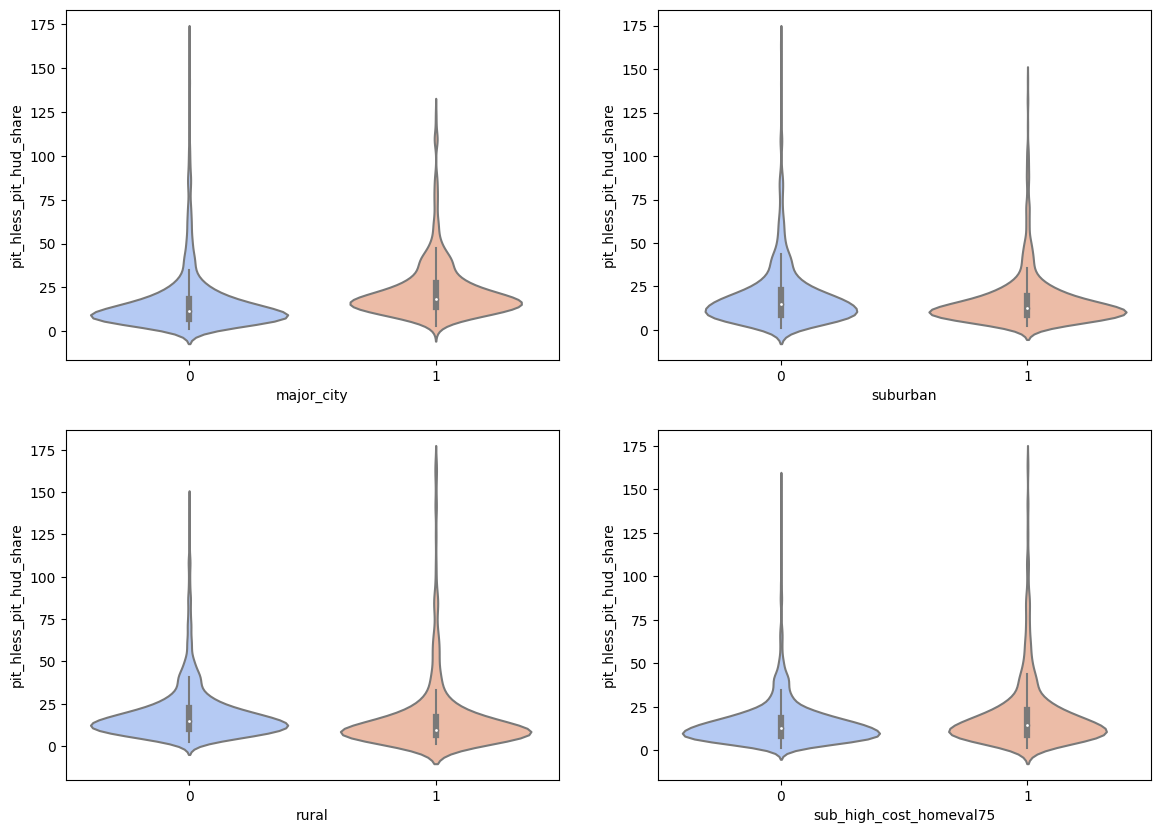

In [166]:
indicators = ['major_city', 'suburban', 'rural', 'sub_high_cost_homeval75']
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

for i, ind in enumerate(indicators):
    sns.violinplot(x=ind, y=target, data=raw_df, palette="coolwarm", ax=ax[i])
    

These violin plot imply that the distribution of the target variable may be slightly different depending on some of our indicator variables. For example, the two features of rural and major city seem to shift the distribution of the target (at least shifting the mode of the distribution). 

Additionally, these graphs show that there may exist some outliers in our target dataset. Let's take a look at these outliers.

In [179]:
outlier_rows = raw_df[raw_df[target] > raw_df[target].mean() + raw_df[target].std() * 2]

outlier_rows.cocnumber.value_counts()

CA-501    8
NY-600    8
CA-504    8
DC-500    8
CA-508    8
FL-604    8
CA-509    8
CA-506    7
FL-518    7
CA-522    7
FL-512    5
FL-519    5
CA-614    5
FL-505    5
OR-501    4
NY-607    3
OR-500    3
FL-501    3
LA-503    3
MA-504    2
MD-501    2
NC-516    2
FL-517    2
HI-500    2
CO-500    2
MA-507    1
MD-508    1
MO-602    1
CA-613    1
CA-603    1
CA-600    1
CA-524    1
OR-505    1
Name: cocnumber, dtype: Int64

We can identify the CoC communities that are most likely to have an outlier rate of homelessness. Some communities to keep in mind are `CA-509`, `DC-500`, `FL-604`. There seem to be some states that are more likely to be outliers, let's take a look at the distribution of states of the outlier rows.

In [180]:
outlier_rows['state_abr'].value_counts()

CA    55
FL    35
NY    11
DC     8
OR     8
LA     3
MA     3
MD     3
CO     2
HI     2
NC     2
MO     1
Name: state_abr, dtype: Int64

As expected, there are only a few states that are often extreme outliers for rates of homelessness. Taking a look at the states with the highest amount of extreme outliers, California and Florida have a few similarities that may suggest further correlational features to add. For example, both states have relatively warm weather. This may suggest that including average temperature + temperature fluctuation year over year for each community may improve predictability.

 #### Geospatial Graphs

It is important to be able to visualize our CoC communities to see exactly what each row of data in our dataset mean. Let's import a CoC regional map dataset from [here](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/about) to map the data geospatially.

In [181]:
import geopandas as gpd

In [184]:
# source for how to load geojson file to pandas dataframe
geo_df = gpd.read_file("data/Continuum_of_Care_(CoC)_Grantee_Areas.geojson")

In [192]:
geo_df.columns

Index(['OBJECTID', 'COCNAME', 'STUSAB', 'COCNUM', 'STATE_NAME', 'STATUS',
       'NEEDSTATUS', 'PPRN', 'ES_CN_HWACW', 'ES_CN_HWOA_TOT', 'ES_CN_HWOC',
       'ES_CN_VET', 'ES_VSO_HWAC_TOT', 'ES_VSO_HWOA_TOT', 'ES_VSO_HWOC_TOT',
       'ES_VSO_VET_TOT', 'TH_CN_HWAC_TOT', 'TH_CN_HWOA', 'TH_CN_HWOC',
       'TH_CN_VET', 'RRH_CN_HWAC_TOT', 'RRH_CN_HWOA', 'RRH_CN_HWOC',
       'RRH_CN_VET', 'PSH_CN_HWAC_TOT', 'PSH_CN_HWOA', 'PSH_CN_HWOC',
       'PSH_CN_VET', 'PSH_CN_CH', 'PSH_U_HWAC_TOT', 'PSH_U_HWOA', 'PSH_U_HWOC',
       'PSH_U_VET', 'PSH_U_CH', 'SH_CN_HWOA', 'SH_CN_HWOC', 'SH_CN_VET',
       'SH_PERS_HWOA', 'UNSH_PERS_HWOA', 'SH_PERS_HWOC', 'UNSH_PERS_HWOC',
       'SH_PERS_HWAC', 'UNSH_PERS_HWAC', 'SH_CH', 'UNSH_CH', 'SH_UY',
       'UNSH_UY', 'SH_VETS', 'UNSH_VETS', 'STATE', 'CONTACT_TYPE', 'PREFIX',
       'FIRST_NAME', 'LAST_NAME', 'SUFFIX', 'TITLE', 'PRIMARY_PHONE',
       'PRIMARY_PHONE_EXT', 'FAX', 'EMAIL_ADDRESS', 'YEAR', 'SHAPE_Length',
       'SHAPE_Area', 'geometry'],
      dt

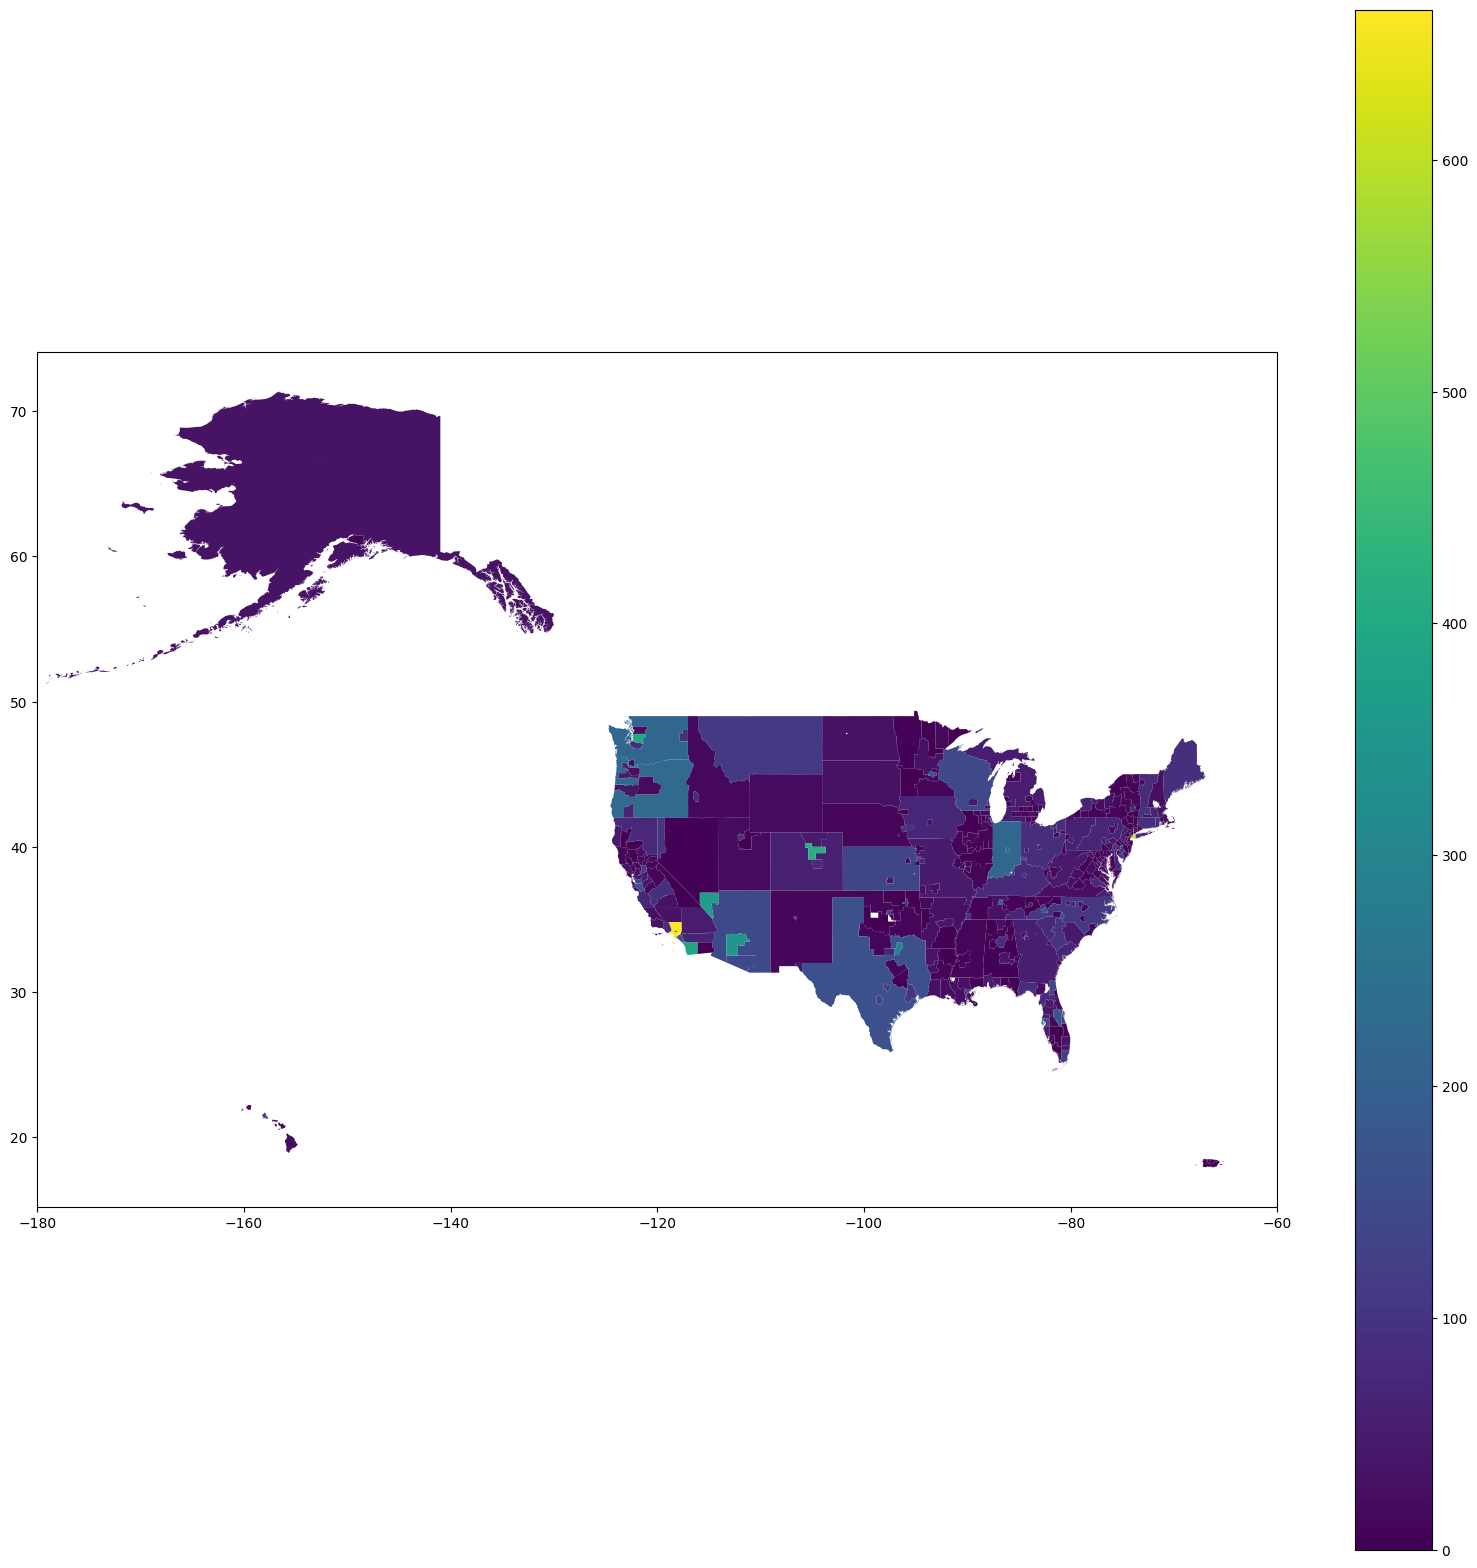

In [211]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(111)
geo_df.plot("SH_VETS", ax=ax, legend=True);
ax.set_xlim(-180, -60);

In [193]:
coc_areas_data_dict = pd.read_excel('./data/DD_Continuum_of_Care_(CoC)_Grantee_Areas.xlsx')
coc_areas_data_dict.head()

,Column Name,Column Description,Type,Width
0,OBJECTID,"In ArcGIS, a system-managed value that uniquel...",NUMBER,NaN
1,COCNAME,Continuum of Care Name,NVARCHAR2,85
2,STUSAB,State Abbreviation,NVARCHAR2,255
3,COCNUM,Six-Digit Unique identifier for each Continuum...,NVARCHAR2,6
4,STATE_NAME,State Name,NVARCHAR2,20


In [194]:
print(tabulate(coc_areas_data_dict[['Column Name', 'Column Description']], headers='keys', tablefmt='psql'))

+----+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Column Name       | Column Description                                                                                                                                                |
|----+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | OBJECTID          | In ArcGIS, a system-managed value that uniquely identifies a record or feature.                                                                                   |
|  1 | COCNAME           | Continuum of Care Name                                                                                                                                            |
|  2 | STUSAB            | State Abbreviation

[map of data](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/explore?location=34.773931%2C-86.921770%2C4.75&style=Shape__Length)

In [99]:

import arcgis

## Modelling

In [100]:
X = raw_df.drop(outcome_features, axis=1)

target_feature = 'pit_tot_hless_pit_hud'
y = raw_df[target_feature]


KeyError: "['d_pit_hless_pit_hud_share', 'd_pit_shelt_pit_hud_share', 'd_pit_unshelt_pit_hud_share'] not found in axis"